In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats.stats import pearsonr
from patsy import dmatrices
from sklearn.metrics import classification_report
from math import sqrt
from scipy.stats.stats import pearsonr
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist

In [26]:
df = pd.read_csv('tshirt_sizes.csv')
print(df[:10])

   Height  Weight Size
0     150      54    S
1     150      55    S
2     151      55    S
3     151      47    S
4     152      58    S
5     155      53    S
6     155      59    S
7     157      60    S
8     157      56    S
9     157      55    S


In [27]:
d_color = {
"S": "b",
"M": "r",
"L": "g",
}

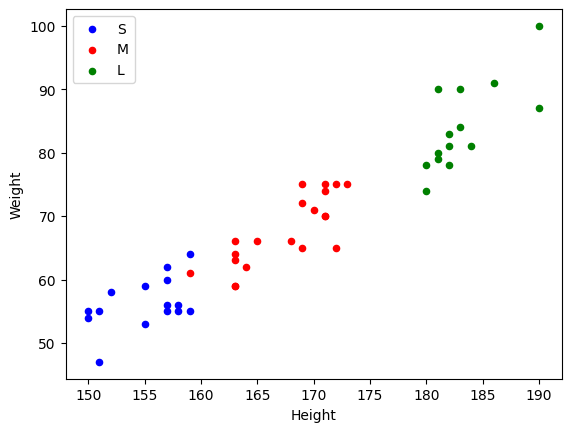

In [28]:
fig, ax = plt.subplots()
for size in ["S","M","L"]:
    color = d_color[size]
    df[df.Size == size].plot(kind='scatter', x = 'Height', y='Weight', label=size, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper left")


In [29]:
km = KMeans(3, init='k-means++', random_state=3425) #initialize
km.fit(df[['Height','Weight']])
df['SizePredict'] = km.predict(df[['Height','Weight']])
df.groupby(['Size','SizePredict']).Size.count()
print(pd.crosstab(df.Size, df.SizePredict, rownames=['Size'],
                  colnames=['SizePredict']))

      

SizePredict   0   1   2
Size                   
L            13   0   1
M             0   6  14
S             0  15   0


/root/tutorial-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
c_map = {
2: "M",
1: "S",
0: "L",
}

In [31]:
df['SizePredict'] = df['SizePredict'].map(c_map)
df['SizePredict'][:10]

0    S
1    S
2    S
3    S
4    S
5    S
6    S
7    S
8    S
9    S
Name: SizePredict, dtype: object

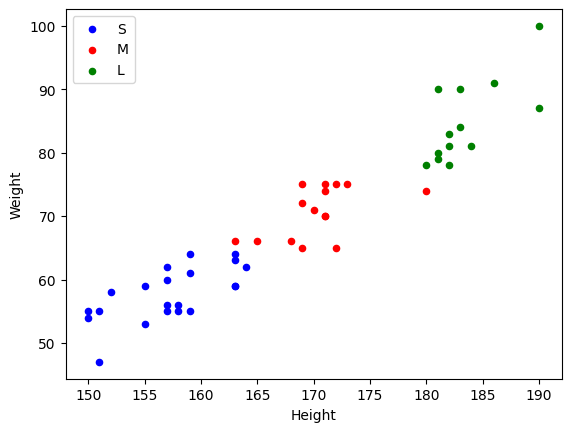

In [32]:
fig, ax = plt.subplots()
for size in ["S","M","L"]:
    color = d_color[size]
    df[df.SizePredict == size].plot(kind='scatter', x='Height', y='Weight', label=size, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper left")

In [33]:
df = pd.read_csv('UN.csv')
df.head()

,country,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,Afghanistan,Asia,6.90,NaN,NaN,NaN,45.0,46.0,154.0,2848.0,87.5,7.2,52.800,85.00
1,Albania,Europe,2.60,NaN,NaN,NaN,68.0,74.0,32.0,863.0,NaN,NaN,NaN,NaN
2,Algeria,Africa,3.81,52.0,11.1,9.9,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.00
3,American.Samoa,Asia,NaN,NaN,NaN,NaN,68.0,73.0,11.0,NaN,58.8,42.4,0.264,0.36
4,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# print the raw column information plus summary header
print('----')
#look at the types of each column explicitly
#[(col, type(df[col][0])) for col in df.columns] [(x, type(df[x][0]))for x in df.columns]

----


In [36]:
print('Percentage of the values complete in the columns')
s_col_fill = df.count(0)/df.shape[0]*100
s_col_fill

Percentage of the values complete in the columns


country                   100.000000
region                    100.000000
tfr                        95.169082
contraception              69.565217
educationMale              36.714976
educationFemale            36.714976
lifeMale                   94.685990
lifeFemale                 94.685990
infantMortality            97.101449
GDPperCapita               95.169082
economicActivityMale       79.710145
economicActivityFemale     79.710145
illiteracyMale             77.294686
illiteracyFemale           77.294686
dtype: float64

In [38]:
df = df[['lifeMale','lifeFemale','infantMortality','GDPperCapita']]
df = df.dropna(how='any')


In [39]:
#Determining the number of clusters
K = range(1,10)

#scipy.cluster.vq.kmeans
KM = [kmeans(df.values, k) for k in K] # apply kmeans 1 to 10
KM[:3]

[(array([[  63.52606383,   68.30904255,   44.30851064, 5890.59574468]]),
  6534.980962662017),
 (array([[6.12227273e+01, 6.57779221e+01, 5.23831169e+01, 2.19273377e+03],
         [7.39588235e+01, 7.97735294e+01, 7.73529412e+00, 2.26397353e+04]]),
  2723.10941096898),
 (array([[7.18862069e+01, 7.75551724e+01, 1.37931034e+01, 1.20441034e+04],
         [6.02309353e+01, 6.46640288e+01, 5.61007194e+01, 1.47384173e+03],
         [7.43050000e+01, 8.02350000e+01, 6.60000000e+00, 2.76644500e+04]]),
  1874.0284870915732)]

In [40]:
euclidean_centroid = [cdist(df.values, centroid, 'euclidean') for(centroid, var) in k_clusters]
                            

NameError: name 'k_clusters' is not defined

NameError: name 'avgWithinSS' is not defined

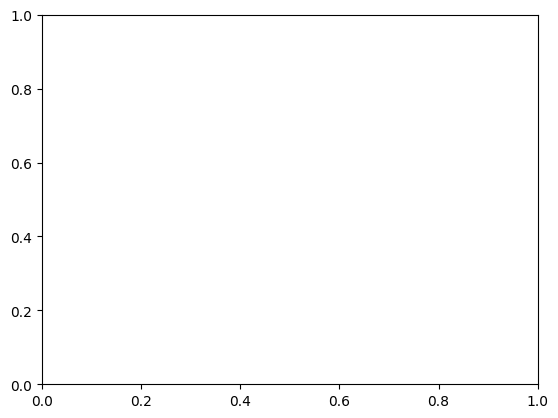

In [41]:
#Choosing the cluster number
kIdx = 2
# plot elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
tt = plt.title('Elbow for K-Means clustering')

In [43]:
#Clustering the countries
km = KMeans(3, init='k-means++', random_state=3425) #initialize
km.fit(df.values)
df['countrySegment'] = km.predict(df.values)
df[:5]

/root/tutorial-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,lifeMale,lifeFemale,infantMortality,GDPperCapita,countrySegment
0,45.0,46.0,154.0,2848.0,1
1,68.0,74.0,32.0,863.0,1
2,67.5,70.3,44.0,1531.0,1
5,44.9,48.1,124.0,355.0,1
7,69.6,76.8,22.0,8055.0,0


In [46]:
df.groupby('countrySegment').GDPperCapita.mean()

countrySegment
0    13800.586207
1     1624.538462
2    29681.625000
Name: GDPperCapita, dtype: float64

In [47]:
clust_map = {
0:'Developing',
1:'Under Developed',
2:'Developed'
}

In [48]:
df.countrySegment = df.countrySegment.map(clust_map)
df[:10]

,lifeMale,lifeFemale,infantMortality,GDPperCapita,countrySegment
0,45.0,46.0,154.0,2848.0,Under Developed
1,68.0,74.0,32.0,863.0,Under Developed
2,67.5,70.3,44.0,1531.0,Under Developed
5,44.9,48.1,124.0,355.0,Under Developed
7,69.6,76.8,22.0,8055.0,Developing
8,67.2,74.0,25.0,354.0,Under Developed
9,75.4,81.2,6.0,20046.0,Developing
10,73.7,80.1,6.0,29006.0,Developed
11,66.5,74.5,33.0,321.0,Under Developed
12,70.5,77.1,14.0,12545.0,Developing


In [49]:
d_color = {
'Developing':'y',
'Under Developed':'r',
'Developed':'g'
}
#Let's see the GDP versus infant mortality rate of the countries for each of the clusters:

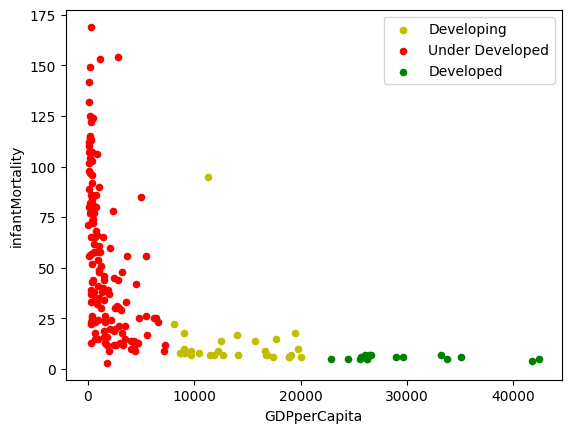

In [50]:
fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.countrySegment == clust].plot(kind='scatter', x='GDPperCapita', y='infantMortality', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")


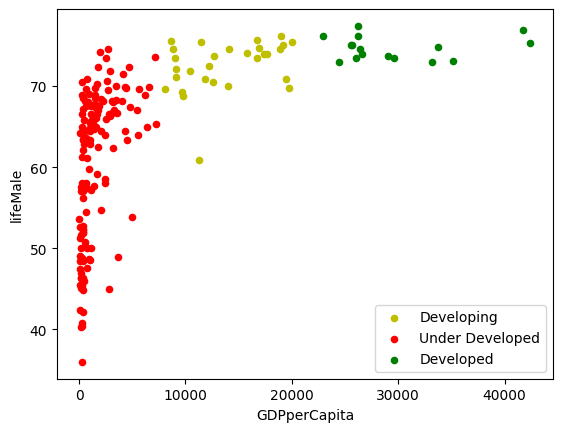

In [51]:
#Let's see the life expectancy of males with respect to the GDP:
fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.countrySegment == clust].plot(kind='scatter', x='GDPperCapita', y='lifeMale', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="lower right")
#We can also clearly see that the countries in green are the underdeveloped nations,
#the one in dark blue are the developing nations, and the ones in red are the
#developed nations.


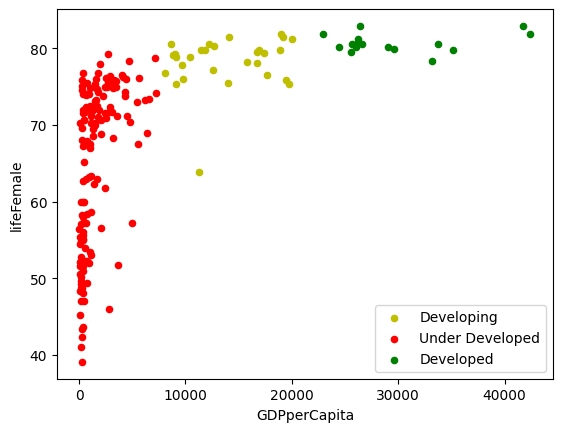

In [52]:
#Now, for the life expectancy of females with regard to the GDP, we'll use this code:

fig,ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.countrySegment == clust].plot(kind='scatter', x='GDPperCapita', y='lifeFemale', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="lower right")
                                        
                                        

